# EXAMEN REGRESIÓN LINEAL
### Miguel Ángel Vélez - 1152469703

In [1]:
#-------Importing from other folder------#

import sys
sys.path.insert(0, "../resources/")

import mstats as ms

#-----------Miguel's statistics----------#

In [2]:
import scipy.stats as ss
import numpy as np

***

# 1.
Se tienen los datos para estudiar la relación entre los ingresos y el consumo de los Estados Unidos durante un periodo prolongado. Las cifras se encuentran en millones de dólares.

|Año|Consumo (Y)|Ingresos (X)|
|-|
|1960|191|284.8|
|1961|206.3|328.4|
|1962|216.7|345.5|
|1963|230|364.6|
|1964|236.5|364.8|
|1965|254.4|398|
|1966|266.7|419.2|
|1967|281.4|441.1|
|1968|290.1|447.3|
|1969|311.2|483.7|

**a. Determine cuál es la variable dependiente y cuál es la independiente.**

In [6]:
x_usa = [284.8, 328.4, 345.5, 364.6, 364.8, 398, 419.2, 441.1, 447.3, 483.7] # Variable independiente -> Ingresos
y_usa = [191, 206.3, 216.7, 230, 236.5, 254.4, 266.7, 281.4, 290.1, 311.2] # Variable dependiente -> Consumo

**b. Calcule e interprete el modelo de regresión. ¿Qué le dice este modelo sobre la relación entre el consumo y el ingreso? ¿Qué proporción de cada dólar adicional que se gana se invierte en consumo?**

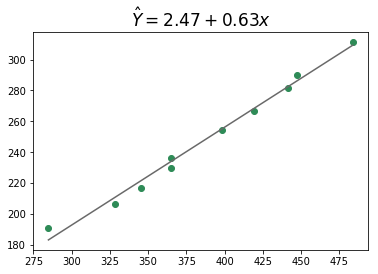

In [7]:
ms.graph.linregr(x_usa, y_usa)

In [8]:
model_usa = ms.linregr.regression(x_usa, y_usa)
model_usa.shape

'ÿ = 2.47 + 0.63x'

Se puede observar que el modelo de regresión que obtuvimos nos muestra teóricamente la relación entre el ingreso de los consumidores y el consumo que hacen; Por cada incremento en una unidad de sus ingresos, el consumo que hacen aumentará en 0.63 unidades.

**c. ¿Qué consumo pronosticaría el modelo si en un año los ingresos son US$346.5?**

In [11]:
model_usa(346.5)

222.27005209227633

Según nuestro modelo de regresión lineal, si en un año los ingresos son de **346.5**, el consumo pronosticado para ese año sería de **222.27005209227633**.

**d. ¿Cuál es el error estándar de estimación para los datos analizados?**

In [12]:
ms.linregr.get_se(x_usa, y_usa)

4.330166595352587

El error estándar que tienen estos datos analizados es de **4.330166595352587** unidades de consumo.

**e. Calcule el coeficiente de correlación y el coeficiente de determinación para los datos analizados.**

In [15]:
r_usa = ms.linregr.get_r(x_usa, y_usa)
r_usa

0.9945083056956981

El coeficiente de correlación para los datos analizados es **0.9945083056956981**. Lo que indica una fuerte relación positiva entre los ingresos de los consumidores y el consumo que hacen.

In [16]:
r2_usa = ms.linregr.get_r2(x_usa, y_usa)
r2_usa

0.9890467700977282

El coeficiente de determinación para los datos analizados es **0.9890467700977282**. Lo que establece que el 98% del cambio en el consumo se explica mediante un cambio en los ingresos de los consumidores.

**f. ¿La relación entre los ingresos y el consumo que está analizando es significativa? Pruebe la hipótesis a un nivel de significancia del 1%.**

In [17]:
sign_usa = 0.01 # Nivel de significancia

* **Plantear las hipótesis**

$H_0: β_1 = 0$ -> *La pendiente de la recta de regresión poblacional es cero*

$H_A: β_1 ≠ 0$ -> *La pendiente de la recta de regresión poblacional es diferente de cero*

* **Valores críticos**

In [18]:
df_usa = len(x_usa) - 2

In [27]:
crit_usa = ms.hypothesis.crit_val_t(df_usa, sign_usa, 'two')
crit_usa

(-3.3553873313333957, 3.3553873313333957)

* **Estadístico de prueba (T)**

In [22]:
t_usa = ms.linregr.get_t_beta(x_usa, y_usa)
t_usa

26.877093759184376

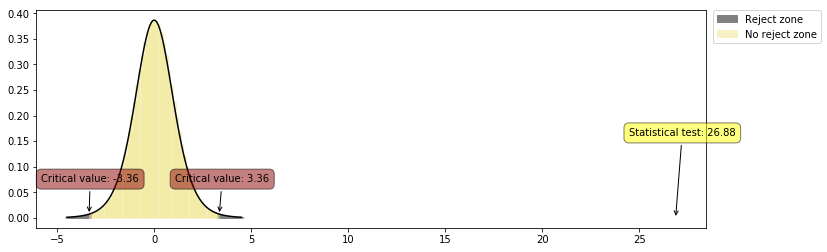

True

In [23]:
distr_usa = ss.t(df_usa)
ms.graph.hypothesis(distr_usa, t_usa, sign_usa, 'two')
ms.hypothesis.reject_h0(crit_usa, t_usa, 'two')

**SI se rechaza la hipótesis nula.** Teniendo en cuenta que el estadístico de prueba *26.877093759184376* es mayor al valor crítico calculado *3.3553873313333957*. Por lo que cae en la zona de rechazo con un nivel de significancia del *1%*.

**R/ **Por lo cual se puede concluir que la relación entre los ingresos y el consumo que se está analizando es significativa, teniendo en cuenta un nivel de significancia del 1%.

Debido a que se ha rechazado la hipótesis nula, usaremos un intervalo de confianza para conocer el valor de $β_1$.

* **Intervalo de confianza para $β_1$**

In [29]:
alpha_usa = 1 - sign_usa
ms.intervals.beta(x_usa, y_usa, alpha_usa)

(0.55763399210146347, 0.71103467461646241)

Entonces, se puede estar un 99% seguro de que el coeficiente de regresión para toda la población de todos los valores de X, está entre **0.55763399210146347** y **0.71103467461646241**.

***